In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
%matplotlib notebook

In [3]:
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

numpy version: 1.15.4
pandas version: 0.23.4
matplotlib version: 3.0.1


# Figure 4

Create Figure 4 (the redshift distribution of SNe in the ZTF BTS) in [Fremling et al. 2020](https://ui.adsabs.harvard.edu/abs/2019arXiv191012973F/abstract).

In [4]:
# BTS data
bts_df = pd.read_hdf('../data/final_rcf_table.h5')

In [5]:
z_sn = bts_df.z_sn.values
z_host = bts_df.z_host.values

norm_Ia = np.where( ( (bts_df.sn_type == 'Ia-norm') | 
                      (bts_df.sn_type == 'Ia') | 
                      (bts_df.sn_type == 'Ia-91bg') | 
                      (bts_df.sn_type == 'Ia-91T') | 
                      (bts_df.sn_type == 'Ia-99aa') | 
                      (bts_df.sn_type == 'ia')
                     | (bts_df.sn_type == 'Ia-norm*')
                     | (bts_df.sn_type == 'Ia-91T*')
                     | (bts_df.sn_type == 'Ia-91T**')
                     | (bts_df.sn_type == 'SN Ia')
                    )
                  )

norm_cc = np.where( (bts_df.sn_type == 'IIb') | 
                    (bts_df.sn_type == 'Ib') | 
                    (bts_df.sn_type == 'IIP') | 
                    (bts_df.sn_type == 'Ib/c') | 
                    (bts_df.sn_type == 'Ic-norm') | 
                    (bts_df.sn_type == 'IIn') | 
                    (bts_df.sn_type == 'IIL') | 
                    (bts_df.sn_type == 'Ic-broad') | 
                    (bts_df.sn_type == 'II') | 
                    (bts_df.sn_type == 'II-pec') | 
                    (bts_df.sn_type == 'Ib-pec') | 
                    (bts_df.sn_type == 'Ic') | 
                    (bts_df.sn_type == 'Ic-BL') | 
                    (bts_df.sn_type == 'IIP*') | 
                    (bts_df.sn_type == 'II*') | 
                    (bts_df.sn_type == 'Ibn') | 
                    (bts_df.sn_type == 'II**') | 
                    (bts_df.sn_type == 'Ib-norm') | 
                    (bts_df.sn_type == 'IIn*')
                  )

has_host_z = np.where((z_host > 0) & np.isfinite(z_host))
no_host = np.where((z_host < 0) | np.isnan(z_host))

has_host_cc = np.intersect1d(has_host_z, norm_cc)
has_host_ia = np.intersect1d(has_host_z, norm_Ia)

no_host_cc = np.intersect1d(no_host, norm_cc)
no_host_ia = np.intersect1d(no_host, norm_Ia)

z_mix = z_sn.copy()
z_mix[has_host_z] = z_host[has_host_z]

<IPython.core.display.Javascript object>


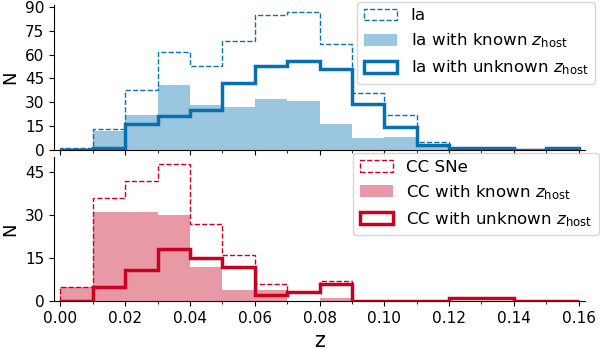

In [6]:
color_dict = {'Ia': '#0571b0', 
              'cc': '#ca0020'}


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,3.5))

# SNe Ia
ax1.hist(z_mix[norm_Ia], histtype='step', 
         range=(0,.16), bins=16, lw=1, ls='--',
         color=color_dict['Ia'], label='Ia')
ax1.hist(z_mix[has_host_ia], histtype='stepfilled', 
         range=(0,.16), bins=16, alpha=0.4,
         color=color_dict['Ia'], label='Ia with known $z_\mathrm{host}$')
ax1.hist(z_mix[no_host_ia], histtype='step', 
         range=(0,.16), bins=16, lw=2.5, 
         color=color_dict['Ia'], label='Ia with unknown $z_\mathrm{host}$')

# CC SNe
ax2.hist(z_mix[norm_cc], histtype='step', 
         range=(0,.16), bins=16, lw=1, ls='--',
         color=color_dict['cc'], label='CC SNe')
ax2.hist(z_mix[has_host_cc], histtype='stepfilled',
         range=(0,.16), bins=16, alpha=0.4,
         color=color_dict['cc'], label='CC with known $z_\mathrm{host}$')
ax2.hist(z_mix[no_host_cc], histtype='step', 
         range=(0,.16), bins=16, lw=2.5, 
         color=color_dict['cc'], label='CC with unknown $z_\mathrm{host}$')

ax2.set_xlim(-0.002,0.162)
ax2.set_xlabel('z', fontsize=15)

ax2.xaxis.set_minor_locator(MultipleLocator(0.01))
ax2.xaxis.set_major_locator(MultipleLocator(0.02))



for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=11)
    ax.legend(loc=10, fontsize=12, bbox_to_anchor=(0.795,0.74))
    ax.set_ylabel('N', fontsize=13)
    ax.yaxis.set_major_locator(MultipleLocator(15))
    
fig.subplots_adjust(left=0.09, right=0.975,top=0.985,bottom=0.14,hspace=0.05)
fig.savefig('redshift_distribution.pdf')